In [1]:
# 확율적 경사 하강법
# SGDClassfier : 손실함수를 사용해서 손실율이 최소가 되는 방향으로 학습을 이어나가는 방법
# 확율 : 무작위 또는 랜덤의 수학적(기술적) 표현
# 경사 : 기울기
# 하강법 : 내려가는 방법

# 경사 하강법 종류:
# 확율적 경사 하강법 -------> SGDClassfier
# 미니배치 경사 하강법  -->  신경망
# 배치 경사 하강법      -->  신경망

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data.csv")

In [4]:
df.head()

Species  Weight  Length  Diagonal   Height   Width
0       A   242.0    25.4      30.0  11.5200  4.0200
1       A   290.0    26.3      31.2  12.4800  4.3056
2       A   340.0    26.5      31.1  12.3778  4.6961
3       A   363.0    29.0      33.5  12.7300  4.4555
4       A   430.0    29.0      34.0  12.4440  5.1340

In [5]:
df.shape

(159, 6)

In [6]:
# 데이터 분리
# 학습용 과 정답(레이블)
y = df['Species']
x = df.iloc[:,1:]
y.shape, x.shape

((159,), (159, 5))

In [7]:
# 7:3 7.5: 2.5  8:2
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target =  train_test_split(x,y,random_state=42)
x_train.shape, x_target.shape, y_train.shape, y_target.shape

((119, 5), (40, 5), (119,), (40,))

In [8]:
# 데이터 표준화 작업
# 결정트리만빼고 다 적용
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler().fit(x_train)
x_train_scaled =  ss.transform(x_train)
x_target_scaled = ss.transform(x_target)
x_train_scaled.shape,  x_target_scaled.shape

((119, 5), (40, 5))

In [10]:
# 확율적 경사 하강법을 적용
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log', max_iter=250,random_state=42)

In [11]:
sgdc.fit(x_train_scaled,y_train)
sgdc.score(x_train_scaled,y_train),  sgdc.score(x_target_scaled,y_target)

(0.8319327731092437, 0.875)

In [12]:
sgdc.partial_fit(x_train_scaled,y_train)
sgdc.score(x_train_scaled,y_train),  sgdc.score(x_target_scaled,y_target)

(0.8907563025210085, 0.925)

In [13]:
#  과적합(과대적합, 과소적합)  overfit
#  이해를 돕기위해서 임의로 그러한 현상 만들어 보기

In [14]:
import numpy as np

In [15]:
sgdc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []

In [16]:
classes = np.unique( y_train ) # 중복없이 순순 데이터만..    

In [17]:
for i in range(300):
    sgdc.partial_fit(x_train_scaled,y_train,classes =classes  )
    train_score.append(sgdc.score(x_train_scaled, y_train))
    test_score.append(sgdc.score(x_target_scaled, y_target))

In [18]:
import matplotlib.pyplot as plt

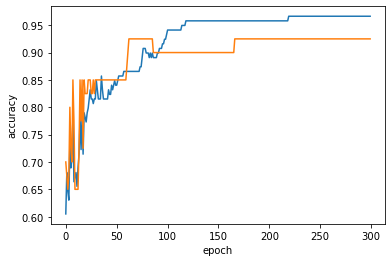

In [19]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

# 결정 트리

In [20]:
win_df = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/wine.csv")
win_df.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [21]:
win_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [22]:
np.unique(win_df['class']) # red white

array([0., 1.])

In [23]:
win_df['class'] = win_df['class'].astype(int)
win_df.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51      0
1      9.8    2.6  3.20      0
2      9.8    2.3  3.26      0
3      9.8    1.9  3.16      0
4      9.4    1.9  3.51      0

In [24]:
# 전처리 : 실수->정수
# X, Y를 분리한다
# 표준화
# 학습용과 검증용 분리
# 머신러닝 : 로지스틱회기
# 적용해서 -> score 및 예측해 보기

In [25]:
y = win_df.iloc[:,-1]
x = win_df.iloc[:,:-1]
y.shape, x.shape

((6497,), (6497, 3))

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x_scaled = ss.transform(x)

In [27]:
x_scaled

array([[-0.91546416, -0.7447781 ,  1.81308951],
       [-0.58006813, -0.59764007, -0.11507303],
       [-0.58006813, -0.66069923,  0.25811972],
       ...,
       [-0.91546416, -0.89191614, -1.42124765],
       [ 1.9354021 , -0.91293585,  0.75571005],
       [ 1.09691202, -0.97599501,  0.25811972]])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_target,y_train,y_target =   train_test_split(x_scaled, y, random_state=42)
x_train.shape,x_target.shape,y_train.shape,y_target.shape

((4872, 3), (1625, 3), (4872,), (1625,))

In [29]:
# 머신러닝의 파라메터의 종류를 출력하는 함수
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
#lr.get_params().keys()
#lr.get_params().values()
lr.get_params()
#pd.DataFrame(lr.get_params().values(), index = lr.get_params().keys())
pd.DataFrame({
    "columns" : lr.get_params().keys(),
    "values":lr.get_params().values()
})

columns  values
0                   C     1.0
1        class_weight    None
2                dual   False
3       fit_intercept    True
4   intercept_scaling       1
5            l1_ratio    None
6            max_iter     100
7         multi_class    auto
8              n_jobs    None
9             penalty      l2
10       random_state    None
11             solver   lbfgs
12                tol  0.0001
13            verbose       0
14         warm_start   False

In [31]:
lr.score(x_train,y_train),  lr.score(x_target, y_target)

(0.7859195402298851, 0.7655384615384615)

In [33]:
# 결정트리.... tree
# 하이퍼 파라메터 튜닝  GridSearchCV 통해서 튜닝...
from sklearn.model_selection import GridSearchCV
parameter = {
    "intercept_scaling":[1,2,3],
    "max_iter":[50,100,150,200],
    "tol" : [0.0001, 0.001,0.01,0.1]
}
model = GridSearchCV(lr,parameter)
model.fit(x_train,y_train)     

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'intercept_scaling': [1, 2, 3],
                         'max_iter': [50, 100, 150, 200],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [34]:
model.best_params_

{'intercept_scaling': 1, 'max_iter': 50, 'tol': 0.0001}

In [35]:
lr = model.best_estimator_

In [36]:
lr.score(x_train,y_train),  lr.score(x_target, y_target)

(0.7859195402298851, 0.7655384615384615)

In [37]:
test = LogisticRegression(intercept_scaling=1,max_iter=50,tol=0.0001)

In [38]:
test.fit(x_train,y_train)
test.score(x_train,y_train), test.score(x_target, y_target)

(0.7859195402298851, 0.7655384615384615)

In [39]:
# 로지스틱회귀가 성능이 낮아서.== 튜닝도 안됨
# 결정트리
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_target, y_target)

(0.9973316912972086, 0.8498461538461538)

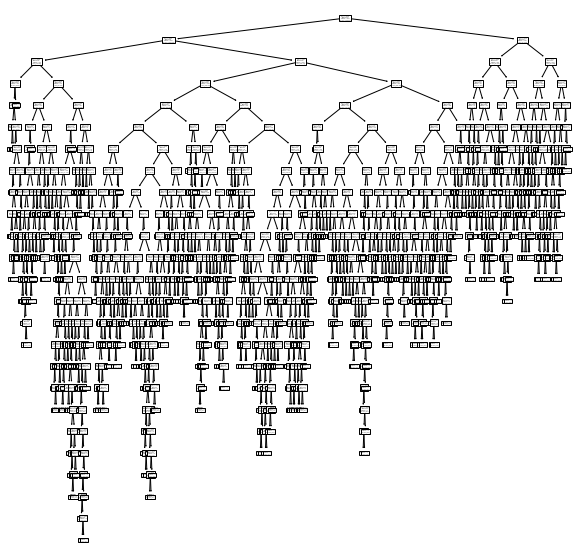

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

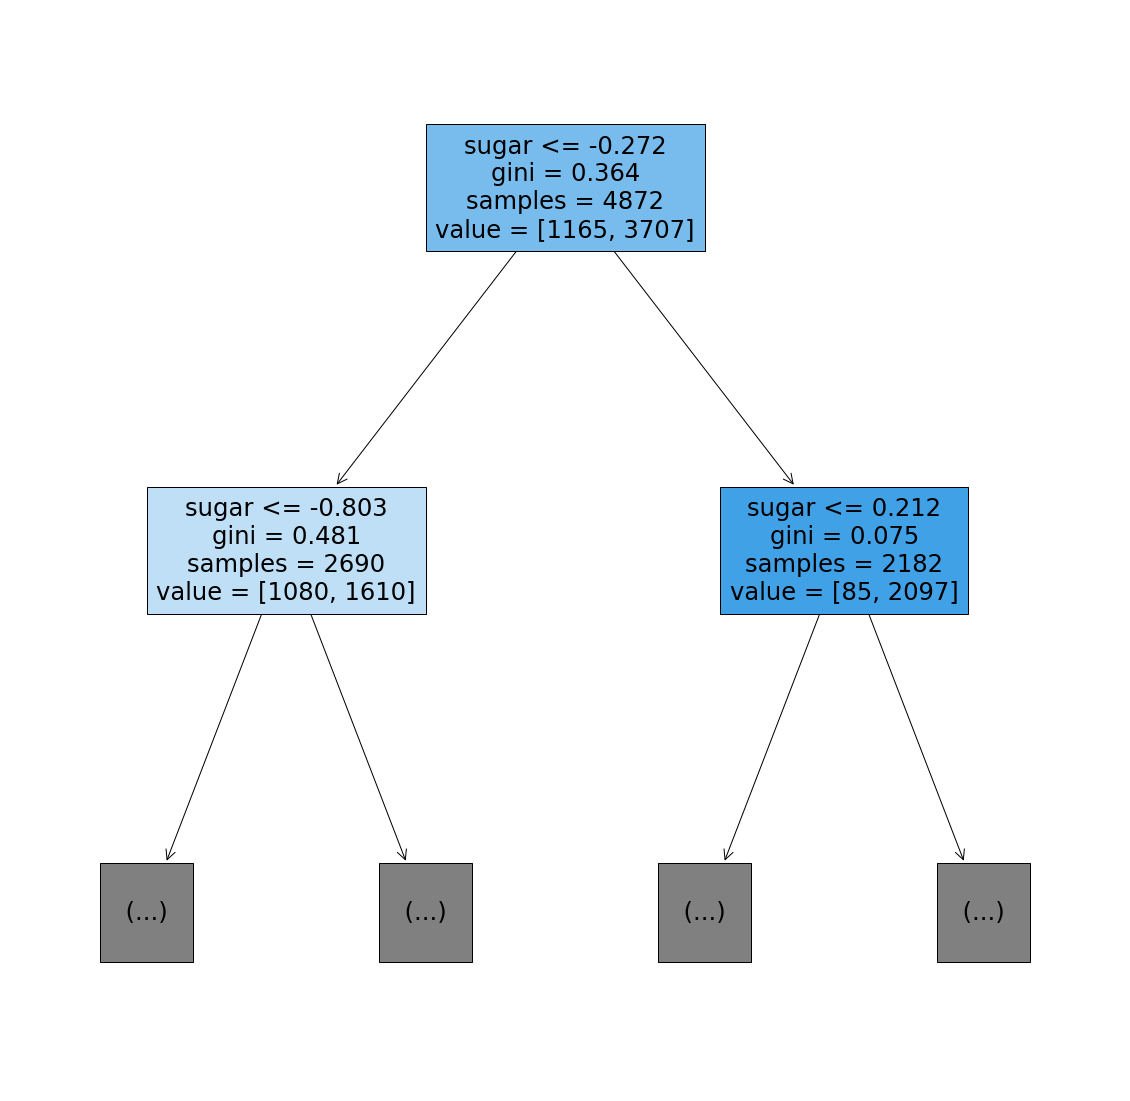

In [41]:
# 노드의 깊이 (차수)를 제한한다...
# 과적합.. 규제방법이 높이 제한
plt.figure(figsize=(20,20))
plot_tree(dtc, max_depth=1, filled=True,feature_names=['alcohol','sugar','pH'] )
plt.show()

In [42]:
dtc =  DecisionTreeClassifier(random_state=42, max_depth=3)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train), dtc.score(x_target, y_target)

(0.8499589490968801, 0.8363076923076923)

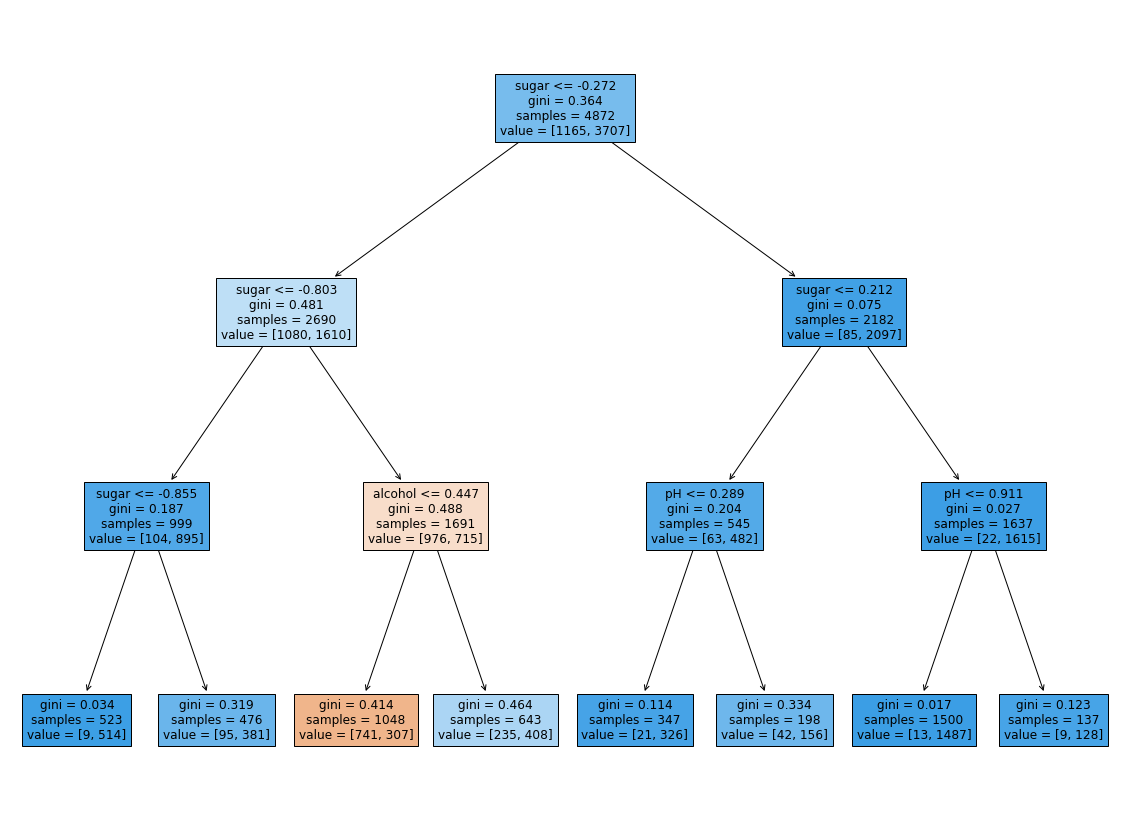

In [43]:
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True,feature_names=['alcohol','sugar','pH'] )
plt.show()

In [44]:
# 앙상블..... 오케스트라 앙상블... 유사 개념